In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess
import nltk
from sklearn.decomposition import TruncatedSVD


In [2]:
df = pd.read_csv('../datasets/NMSendataset_wordtoken_lda_2023.csv', encoding='utf-8')
df

,_id,recommend,found_helpful,found_funny,Column1,time,reply_count,content,hrs_on_second,hrs_at_reviwer_time,reviwer_num,language,sent_content,preprocessed_reviews_sec,wordtoken,correctmapping,preprocessed_reviews_lda
0,5f75ad269136b25c3c8b50f8,True,1,0,9,2023/2/29,0,\r\n\t\t\t\t\t\t\t\tthis good\t\t\t\t\t\t\t,0.5,37.9,15,en,\r\n\t\t\t\t\t\t\t\tthis good,this good,['good'],"['this', 'good']",good
1,5f771cbbee89a0be76bd8c80,True,1,0,9,2023/2/29,0,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,19.4,352.6,16,en,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,what a difference a few year make .,"['difference', 'year']","['what', 'difference', 'few', 'year', 'make']",difference year make
2,5f771cbbee89a0be76bd8c80,True,1,0,9,2023/2/29,0,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,19.4,352.6,16,en,"From its messy origins, No Man's Sky has grown...",from it messy origin: no man be sky have grown...,"['messy', 'origin', 'no_man_sky', 'grown', 'de...","['from', 'it', 'messy', 'origin', 'no', 'man',...",messy origin no man sky grown deeper polished ...
3,5f771cbbee89a0be76bd8c80,True,1,0,9,2023/2/29,0,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,19.4,352.6,16,en,"The vast universe is enticing, and there's ple...",the vast universe be entice: and there be plen...,"['vast', 'universe', 'entice', 'plenty', 'most...","['the', 'vast', 'universe', 'be', 'entice', 'a...",vast universe entice plenty mostly either expl...
4,5f771cbbee89a0be76bd8c80,True,1,0,9,2023/2/29,0,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,19.4,352.6,16,en,"And with proper multiplayer now introduced, it...",and with proper multiplayer now introduce: it ...,"['proper', 'multiplayer', 'introduce', 'lonely...","['and', 'with', 'proper', 'multiplayer', 'now'...",proper multiplayer introduce lonely experience...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476338,64abdb8a38d28815033e7a39,False,0,0,5,12/08/2016,1,\r\n\t\t\t\t\t\t\t\tThis isn't a PC game. It'...,0.0,44.9,37,en,"If the game was $20 I'd keep it, but definitel...",if the game be $ 20 i would keep it: but defin...,"['20', 'would', 'definitely', 'worth_60', 'ref...","['if', 'the', 'game', 'be', '20', 'would', 'ke...",20 would keep definitely worth 60 refund time
476339,64abf8e1b4d8ae53485d2c42,True,0,0,5,12/08/2016,0,\r\n\t\t\t\t\t\t\t\tIt's pretty interesting\t\...,0.0,23.2,42,en,\r\n\t\t\t\t\t\t\t\tIt's pretty interesting,\r\n it be pretty interest,"['pretty', 'interest']","['it', 'be', 'pretty', 'interest']",pretty interest
476340,64ac11efb4d8ae53485d2c6b,False,0,0,5,12/08/2016,2,\r\n\t\t\t\t\t\t\t\tI dislike the fact that al...,0.0,53.4,17,en,\r\n\t\t\t\t\t\t\t\tI dislike the fact that al...,\r\n i dislike the fact that all the creature ...,"['dislike', 'fact', 'creature', 'promise', 'cr...","['dislike', 'the', 'fact', 'that', 'all', 'the...",dislike fact creature promise creature keep sh...
476341,64ac11efb4d8ae53485d2c6b,False,0,0,5,12/08/2016,2,\r\n\t\t\t\t\t\t\t\tI dislike the fact that al...,0.0,53.4,17,en,Please add the creatures into the game.,please add the creature into the game .,"['please', 'add', 'creature']","['please', 'add', 'the', 'creature', 'into', '...",please add creature


In [3]:
def convert(s):
    s = eval(s)
    s = ' '.join(s)
    return s
df['wordtoken'] = df['wordtoken'].apply(convert)

In [4]:
processed_docs = df['wordtoken']
processed_docs

0                                                      good
1                                           difference year
2         messy origin no_man_sky grown deeper polished ...
3         vast universe entice plenty mostly either expl...
4         proper multiplayer introduce lonely experience...
                                ...                        
476338             20 would definitely worth_60 refund time
476339                                      pretty interest
476340    dislike fact creature promise creature show bo...
476341                                  please add creature
476342                                           start play
Name: wordtoken, Length: 476343, dtype: object

In [5]:
# Preprocess the documents
stop_words = set(stopwords.words('english'))
def preprocess(text):
    return [word for word in simple_preprocess(text) if word not in stop_words]

processed_docs = [preprocess(doc) for doc in processed_docs]

In [6]:
processed_docs

[['good'],
 ['difference', 'year'],
 ['messy',
  'origin',
  'no_man_sky',
  'grown',
  'deeper',
  'polished',
  'developer',
  'work',
  'something',
  'like',
  'initial',
  'promise'],
 ['vast',
  'universe',
  'entice',
  'plenty',
  'mostly',
  'either',
  'explore',
  'build'],
 ['proper', 'multiplayer', 'introduce', 'lonely', 'experience', 'either'],
 ['complete', 'fantastic'],
 ['would',
  'recommend',
  'everyone',
  'plus',
  'think',
  'would',
  'amaze',
  'virtual_reality',
  'wait',
  'try'],
 ['recently', 'bought', 'play', 'virtual_reality'],
 ['incredible'],
 ['played', 'hour', 'far', 'feel_like', 'get', 'start'],
 ['even',
  'stop',
  'play',
  'today',
  'worth_money',
  'virtual_reality',
  'experience'],
 ['fun'],
 ['many', 'thing', 'people'],
 ['yes'],
 ['finally', 'fully', 'fledged', 'multiplayer', 'system'],
 ['however', 'glitchy', 'mess'],
 ['many', 'breaking', 'bug'],
 ['super', 'buggy', 'general'],
 ['play',
  'never',
  'encounter',
  'breaking',
  'bug',
  

In [62]:
# Function to calculate coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = KMeans(n_clusters=num_topics, random_state=42)
        model.fit(corpus)
        topics = [[dictionary[word_id] for word_id in np.argsort(topic)[:-10 - 1:-1]] for topic in model.cluster_centers_]
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_npmi')
        coherence_values.append(coherence_model.get_coherence())
    return coherence_values

In [63]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(doc) for doc in processed_docs])

# BoW Vectorization
bow_vectorizer = CountVectorizer(stop_words='english')
bow_matrix = bow_vectorizer.fit_transform([' '.join(doc) for doc in processed_docs])

In [64]:
# Dimensionality Reduction with Truncated SVD
n_components = 100  # Number of components for SVD, adjust as necessary
svd = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)
bow_matrix_reduced = svd.fit_transform(bow_matrix)

In [65]:
# Create Dictionary and Corpus for Gensim Coherence Model
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [71]:
# Compute coherence score for TF-IDF
tfidf_coherence_values = compute_coherence_values(dictionary, tfidf_matrix_reduced, processed_docs, limit=100)

# Compute coherence score for BoW
bow_coherence_values = compute_coherence_values(dictionary, bow_matrix_reduced, processed_docs, limit=100)

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

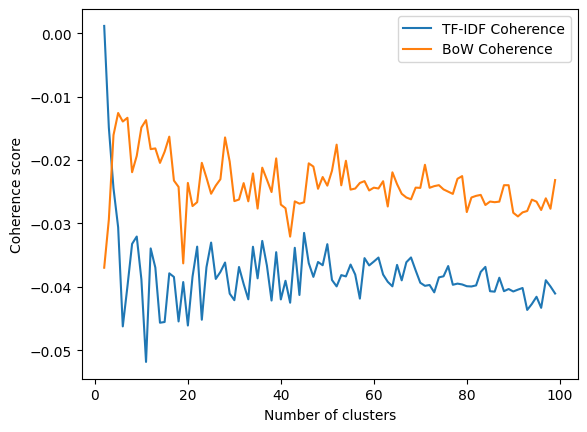

In [72]:
# Plot the coherence scores
x = range(2, 100, 1)
plt.plot(x, tfidf_coherence_values, label='TF-IDF Coherence')
plt.plot(x, bow_coherence_values, label='BoW Coherence')
plt.xlabel("Number of clusters")
plt.ylabel("Coherence score")
plt.legend()
plt.show()

In [73]:
# Optimal number of clusters
optimal_clusters_tfidf = tfidf_coherence_values.index(max(tfidf_coherence_values)) + 2
optimal_clusters_bow = bow_coherence_values.index(max(bow_coherence_values)) + 2

print(f'Optimal number of clusters for TF-IDF: {optimal_clusters_tfidf}')
print(f'Optimal number of clusters for BoW: {optimal_clusters_bow}')

Optimal number of clusters for TF-IDF: 2
Optimal number of clusters for BoW: 5


In [74]:
bow_coherence_values

[-0.03699476352368138,
 -0.029392167451963994,
 -0.016072160794469947,
 -0.012591942365019305,
 -0.013936009426732739,
 -0.013348000711874808,
 -0.021930216426810548,
 -0.019355680187245358,
 -0.014881317550942635,
 -0.013715716293416329,
 -0.01829120863014795,
 -0.0181772090340188,
 -0.020460225098461158,
 -0.01869305467015504,
 -0.016320769654288886,
 -0.023247371593320715,
 -0.024253025274269275,
 -0.03631027807413167,
 -0.02362459397485219,
 -0.02727075073309512,
 -0.026654920802254824,
 -0.02045226573600914,
 -0.02279737296770328,
 -0.025326864821021068,
 -0.024046840206828686,
 -0.023032364368152005,
 -0.01644779002357864,
 -0.020271539139597002,
 -0.02649124254314118,
 -0.026235933466238894,
 -0.023650642851637885,
 -0.026524405242659903,
 -0.022126944990562752,
 -0.027666528195471822,
 -0.021215770340248814,
 -0.02310327711946667,
 -0.025056884022293134,
 -0.019754041266193952,
 -0.027039596860442938,
 -0.027611187543253566,
 -0.03208866235185458,
 -0.02652933708892753,
 -0.026

In [75]:
tfidf_coherence_values

[0.0011425573885355325,
 -0.014900583234063175,
 -0.024470377523204204,
 -0.030614289218181222,
 -0.04625044062759781,
 -0.03994516055417841,
 -0.0332367113597378,
 -0.032076390913685277,
 -0.03882219995557247,
 -0.0518533938918637,
 -0.03395166381593336,
 -0.03696721207336143,
 -0.0456711693195561,
 -0.045556546462255675,
 -0.037879048752770185,
 -0.038450221501943535,
 -0.04546746703086009,
 -0.03925668383337577,
 -0.046109749425789305,
 -0.038414578043624664,
 -0.03366795270923172,
 -0.04520023819901193,
 -0.03691229392651898,
 -0.03303108721384902,
 -0.038765244529273955,
 -0.03765931337380041,
 -0.03617651621040331,
 -0.041083930462461955,
 -0.042116770388612605,
 -0.036877079696229456,
 -0.039565336830293396,
 -0.04198043011785693,
 -0.03368722363267292,
 -0.038668870414647685,
 -0.03276988552798711,
 -0.03665007121856889,
 -0.04216860101555214,
 -0.03454348563534527,
 -0.04200130485435723,
 -0.03905309091037558,
 -0.04251143835925836,
 -0.033851140441198455,
 -0.0412958482123888

In [76]:
# Function to calculate coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = KMeans(n_clusters=num_topics, random_state=42)
        model.fit(corpus)
        topics = [[dictionary[word_id] for word_id in np.argsort(topic)[:-10 - 1:-1]] for topic in model.cluster_centers_]
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_uci')
        coherence_values.append(coherence_model.get_coherence())
    return coherence_values



# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(doc) for doc in processed_docs])

# BoW Vectorization
bow_vectorizer = CountVectorizer(stop_words='english')
bow_matrix = bow_vectorizer.fit_transform([' '.join(doc) for doc in processed_docs])


# Dimensionality Reduction with Truncated SVD
n_components = 100  # Number of components for SVD, adjust as necessary
svd = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)
bow_matrix_reduced = svd.fit_transform(bow_matrix)

# Create Dictionary and Corpus for Gensim Coherence Model
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Compute coherence score for TF-IDF
tfidf_coherence_values = compute_coherence_values(dictionary, tfidf_matrix_reduced, processed_docs, limit=100)

# Compute coherence score for BoW
bow_coherence_values = compute_coherence_values(dictionary, bow_matrix_reduced, processed_docs, limit=100)

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Software\Anac

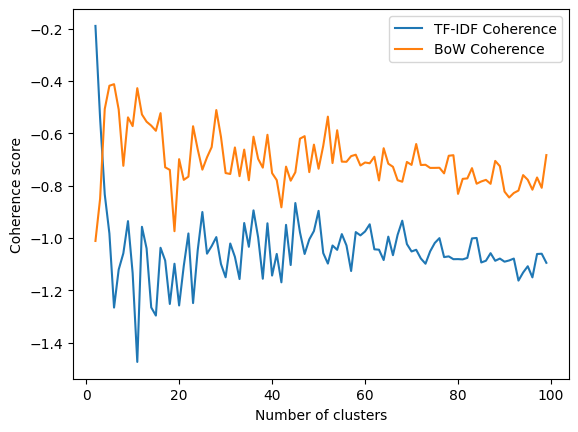

In [77]:
# Plot the coherence scores
x = range(2, 100, 1)
plt.plot(x, tfidf_coherence_values, label='TF-IDF Coherence')
plt.plot(x, bow_coherence_values, label='BoW Coherence')
plt.xlabel("Number of clusters")
plt.ylabel("Coherence score")
plt.legend()
plt.show()

In [78]:
# Optimal number of clusters
optimal_clusters_tfidf = tfidf_coherence_values.index(max(tfidf_coherence_values)) + 2
optimal_clusters_bow = bow_coherence_values.index(max(bow_coherence_values)) + 2

print(f'Optimal number of clusters for TF-IDF: {optimal_clusters_tfidf}')
print(f'Optimal number of clusters for BoW: {optimal_clusters_bow}')

Optimal number of clusters for TF-IDF: 2
Optimal number of clusters for BoW: 6


In [79]:
bow_coherence_values

[-1.0111408410634524,
 -0.8500174921750606,
 -0.5068008881431937,
 -0.41790570103725166,
 -0.41195629442880266,
 -0.5088599367779902,
 -0.7239795810681178,
 -0.5387574757313013,
 -0.5722352967462914,
 -0.4272643635054562,
 -0.5276660515629171,
 -0.5553813313955103,
 -0.5703540758472144,
 -0.5900892601687093,
 -0.5225400122398618,
 -0.7296847798488895,
 -0.7395539749216654,
 -0.9738792969781277,
 -0.698593006822009,
 -0.7776174147626114,
 -0.7653452562825032,
 -0.572746336214798,
 -0.661133090756811,
 -0.7386517921376101,
 -0.6914734563649325,
 -0.6525044309220497,
 -0.5109188440057261,
 -0.6130126171682881,
 -0.7516451319758469,
 -0.7551915172823049,
 -0.6538627658502811,
 -0.7635690623767172,
 -0.6620607104205712,
 -0.7790994634290519,
 -0.6127321992514936,
 -0.6975224453157309,
 -0.7309509904528458,
 -0.6053827754103275,
 -0.7519397750681134,
 -0.7787267930317324,
 -0.8825829236333989,
 -0.727081860739371,
 -0.7808607937378064,
 -0.7486584736867854,
 -0.6201529341461763,
 -0.61068429

In [80]:
tfidf_coherence_values

[-0.18927447384281598,
 -0.5420986368790075,
 -0.8331383967028276,
 -0.9825867005599246,
 -1.2658117312757038,
 -1.1205958361827035,
 -1.0584696551576982,
 -0.9353749659202824,
 -1.133722888145509,
 -1.4735504811716111,
 -0.9571207271340089,
 -1.0397099974772936,
 -1.2653245123830072,
 -1.2963951430320317,
 -1.0371772848664373,
 -1.08603646579002,
 -1.2520279058114117,
 -1.0982983731537608,
 -1.2577370485800787,
 -1.1066044665131411,
 -0.9825076502746143,
 -1.248672004025256,
 -1.0466470653729139,
 -0.9006020749789947,
 -1.0598064257714763,
 -1.0308847420681448,
 -0.9964439732734409,
 -1.0992004256179349,
 -1.150011422010469,
 -1.0209197884756205,
 -1.0719098252377597,
 -1.1567108936590054,
 -0.942658333426677,
 -1.033427552744691,
 -0.8942760016525164,
 -0.997540340577012,
 -1.1556054795912203,
 -0.9436701258421917,
 -1.143371231479176,
 -1.0607453278752266,
 -1.1693375878518018,
 -0.949669660936657,
 -1.103178243058349,
 -0.8662460070286359,
 -0.9785417611713589,
 -1.0609387482652008